###  Q1. What is the mathematical formula for a linear SVM?

A **linear SVM** finds a hyperplane that best separates the classes.  
The decision function is:

$$
f(x) = \mathbf{w}^T \mathbf{x} + b
$$

Where:
- $$ \mathbf{w} $$ is the weight vector (normal to the hyperplane)
- $$ b $$ is the bias
- $$ \mathbf{x} $$ is the input vector

The classification decision is:
$$
\text{Class} = \text{sign}(\mathbf{w}^T \mathbf{x} + b)
$$

---

###  Q2. What is the objective function of a linear SVM?

We want to **maximize the margin** and **minimize misclassifications**, so the objective is:

$$
\min_{\mathbf{w}, b} \frac{1}{2} ||\mathbf{w}||^2 + C \sum_{i=1}^{n} \xi_i
$$

Subject to:

$$
y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1 - \xi_i,\quad \xi_i \geq 0
$$

- $$ \xi_i $$: slack variables (allow margin violations)
- $$ C $$: regularization parameter (controls trade-off between margin size and classification error)

---

###  Q3. What is the kernel trick in SVM?

The **kernel trick** allows SVMs to learn **non-linear boundaries** by implicitly mapping data into higher-dimensional space without computing the transformation explicitly.

Common kernels:
- **Linear kernel**: $$ K(x, x') = x^T x' $$
- **Polynomial kernel**: $$ K(x, x') = (x^T x' + c)^d $$
- **RBF (Gaussian) kernel**: $$ K(x, x') = \exp(-\gamma ||x - x'||^2) $$

---

###  Q4. Role of Support Vectors in SVM

**Support vectors** are the **data points closest to the decision boundary**. They directly influence the position and orientation of the hyperplane.

📌 Example:  
If you have two classes in 2D, support vectors are those few points that the margin "touches." Removing them changes the hyperplane; removing others does not.

---

###  Q5. Illustrate Hyperplane, Marginal Plane, Soft Margin, Hard Margin



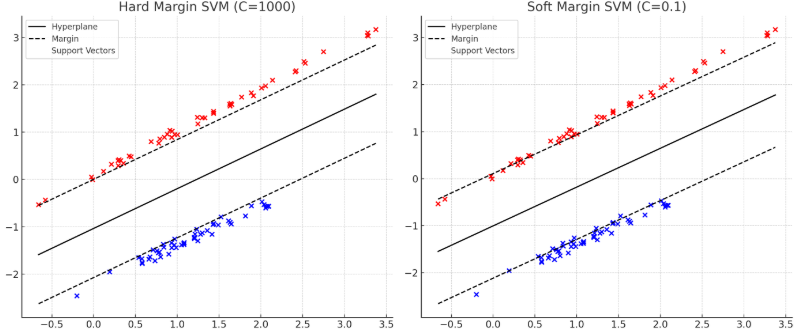

The plots above illustrate:

- **Hyperplane**: Solid black line dividing the classes.
- **Marginal Planes**: Dashed lines — these define the boundaries where support vectors lie.
- **Hard Margin (Left)**: SVM tries to separate classes with no tolerance for misclassification (C=1000).
- **Soft Margin (Right)**: SVM allows some misclassifications to better generalize (C=0.1).

---

### ✅ Q6. SVM Implementation using Iris Dataset

#### 1. Loading the Dataset and Splitting

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length, sepal width)
y = iris.target

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

#### 2. Custom Linear SVM Implementation

Now, we'll implement a basic linear SVM classifier from scratch using gradient descent.

```python
class LinearSVM:
    def __init__(self, C=1.0, learning_rate=0.01, max_iter=1000):
        self.C = C  # Regularization parameter
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def fit(self, X, y):
        m, n = X.shape
        y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1
        self.W = np.zeros(n)
        self.b = 0
        for _ in range(self.max_iter):
            for i in range(m):
                if y[i] * (np.dot(X[i], self.W) + self.b) < 1:
                    self.W -= self.learning_rate * (2 * self.C * self.W - np.dot(X[i], y[i]))
                    self.b -= self.learning_rate * y[i]
                else:
                    self.W -= self.learning_rate * 2 * self.C * self.W
        return self

    def predict(self, X):
        return np.sign(np.dot(X, self.W) + self.b)
```

#### 3. Train and Test the Custom Linear SVM

```python
# Initialize the custom Linear SVM
svm_custom = LinearSVM(C=1.0)
svm_custom.fit(X_train, y_train)

# Predict on the test set
y_pred_custom = svm_custom.predict(X_test)

# Calculate accuracy
accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"Custom Linear SVM Accuracy: {accuracy_custom:.4f}")
```

#### 4. Train and Test Scikit-Learn's Linear SVM

```python
# Initialize the scikit-learn Linear SVM
svm_sklearn = svm.SVC(kernel='linear', C=1.0)
svm_sklearn.fit(X_train, y_train)

# Predict on the test set
y_pred_sklearn = svm_sklearn.predict(X_test)

# Calculate accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-Learn Linear SVM Accuracy: {accuracy_sklearn:.4f}")
```

#### 5. Plotting the Decision Boundaries

```python
# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    h = 0.02  # Step size in the meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.75)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title("Decision Boundaries (Linear SVM)")

# Plot decision boundaries of the custom SVM
plt.figure(figsize=(8, 6))
plot_decision_boundaries(X_test, y_test, svm_custom)
plt.show()

# Plot decision boundaries of the sklearn SVM
plt.figure(figsize=(8, 6))
plot_decision_boundaries(X_test, y_test, svm_sklearn)
plt.show()
```

#### 6. Experimenting with Different Values of Regularization Parameter `C`

```python
# Try different values of C and observe how it affects the performance
C_values = [0.01, 0.1, 1, 10, 100]
for C in C_values:
    svm_sklearn = svm.SVC(kernel='linear', C=C)
    svm_sklearn.fit(X_train, y_train)
    y_pred_sklearn = svm_sklearn.predict(X_test)
    accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
    print(f"Accuracy with C={C}: {accuracy_sklearn:.4f}")
```